In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import time
import umap

In [3]:
# Load the MNIST dataset from CSV
mnist = pd.read_csv(r'H:\Project\Image Dimensionality Reduction\MNIST\train.csv')

# Separate labels and features
y = mnist['label']
X = mnist.drop(columns=['label'])

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training Data

In [4]:
# Apply PCA
start_time = time.time()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_time = time.time() - start_time

# Apply t-SNE
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_time = time.time() - start_time

# Apply UMAP
start_time = time.time()
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X_scaled)
umap_time = time.time() - start_time

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


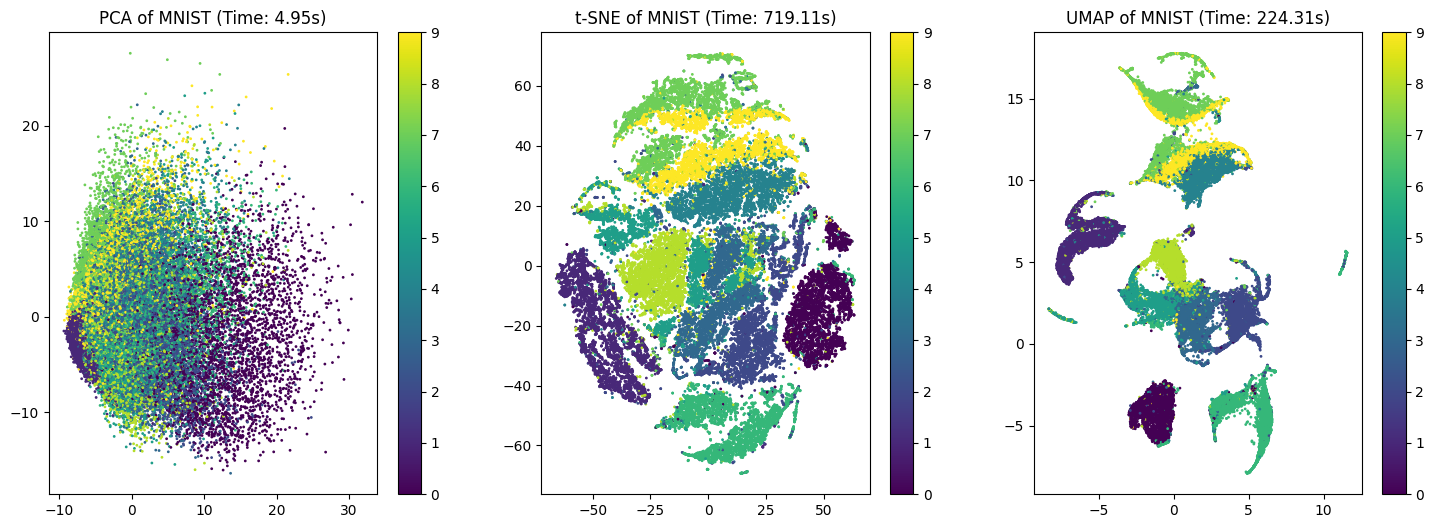

In [5]:
# Plot the PCA results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=1)
plt.title(f'PCA of MNIST (Time: {pca_time:.2f}s)')
plt.colorbar()

# Plot the t-SNE results
plt.subplot(1, 3, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', s=1)
plt.title(f't-SNE of MNIST (Time: {tsne_time:.2f}s)')
plt.colorbar()

# Plot the UMAP results
plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=1)
plt.title(f'UMAP of MNIST (Time: {umap_time:.2f}s)')
plt.colorbar()

plt.show()

# Testing Data

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_16080\4102877767.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], cmap='viridis', s=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_16080\4102877767.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], cmap='viridis', s=1)
C:\Users\HP\AppData\Local\Temp\ipykernel_16080\4102877767.py:27: UserWarning: No data for colormapping provided via 'c'. Para

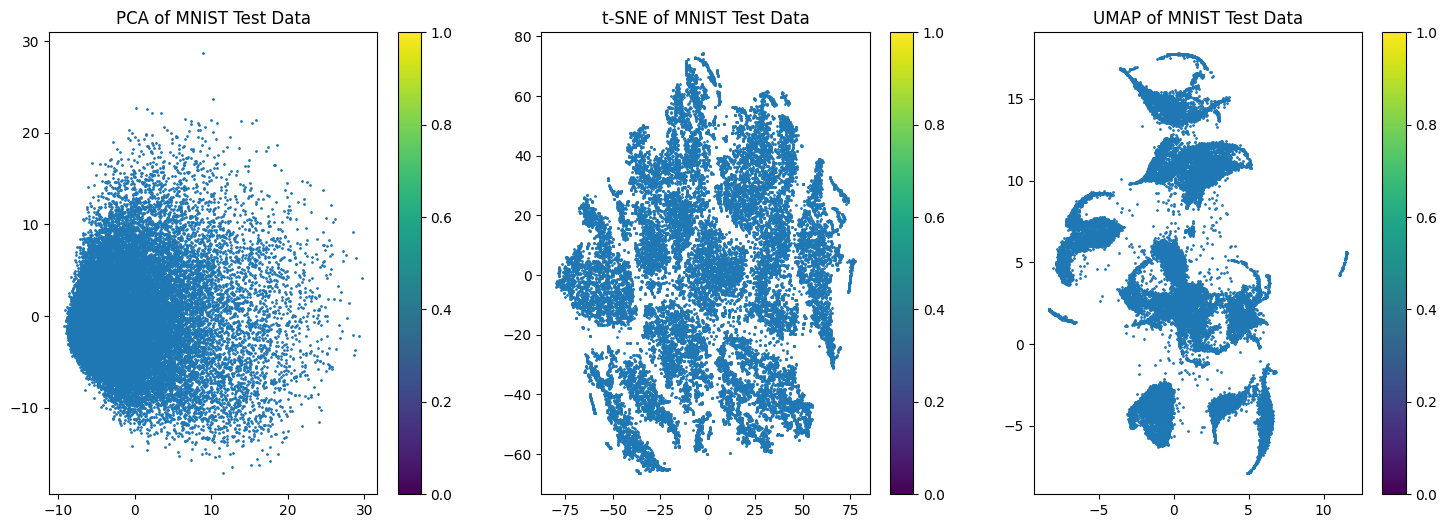

In [8]:
mnist_test = pd.read_csv(r'H:\Project\Image Dimensionality Reduction\MNIST\test.csv')

# Preprocess the test data
X_test = mnist_test  # No label column in test data
X_test_scaled = scaler.transform(X_test)

# Transform the test data using the trained models
X_test_pca = pca.transform(X_test_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)
X_test_umap = umap_reducer.transform(X_test_scaled)

# Plot the PCA results for test data
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], cmap='viridis', s=1)
plt.title('PCA of MNIST Test Data')
plt.colorbar()

# Plot the t-SNE results for test data
plt.subplot(1, 3, 2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], cmap='viridis', s=1)
plt.title('t-SNE of MNIST Test Data')
plt.colorbar()

# Plot the UMAP results for test data
plt.subplot(1, 3, 3)
plt.scatter(X_test_umap[:, 0], X_test_umap[:, 1], cmap='viridis', s=1)
plt.title('UMAP of MNIST Test Data')
plt.colorbar()

plt.show()

# Sample Submission

In [9]:
# Load the sample submission file
sample_submission = pd.read_csv(r'H:\Project\Image Dimensionality Reduction\MNIST\sample_submission.csv')

# Fill the sample submission file with PCA results
# Assuming the sample submission file has columns 'ID' and 'Label'
# and you want to fill the 'Label' column with the first principal component
sample_submission['Label'] = X_test_pca[:, 0]  # Use the first principal component

# Save the submission file
sample_submission.to_csv(r'H:\Project\Image Dimensionality Reduction\MNIST\ output.csv', index=False)